In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
plt.style.use('seaborn')
import numpy as np

In [2]:
def allowance_on(gross):
    # Personal allowance for earners < 100000 is 11000
    if gross <= 100000:
        return 11000
    else:
        # This is reduced by £1 for every £2 above £100000
        return max(0,11000-(gross-100000)//2)

def tax_on(gross,bands):
    # Get personal allowance
    allowance = allowance_on(gross)
    # Taxable income = gross salary - personal allowance
    taxable = max(0,gross-allowance)
    tax = 0
    for threshold, rate in bands:
        if taxable > threshold:
            # How far into this band is your taxable income?
            taxable_at_this_rate = taxable - threshold
            tax += taxable_at_this_rate * rate
            # Now continue downward from this threshold
            taxable = threshold
    return tax
# Current bands
# A list of tuples (minimum taxable income, marginal rate)
bands0 = [(150000,0.45),(32000,0.4),(0,0.2)]
# Proposed bands
bands1 = [(123000,0.5),(80000,0.45),(32000,0.4),(0,0.2)]

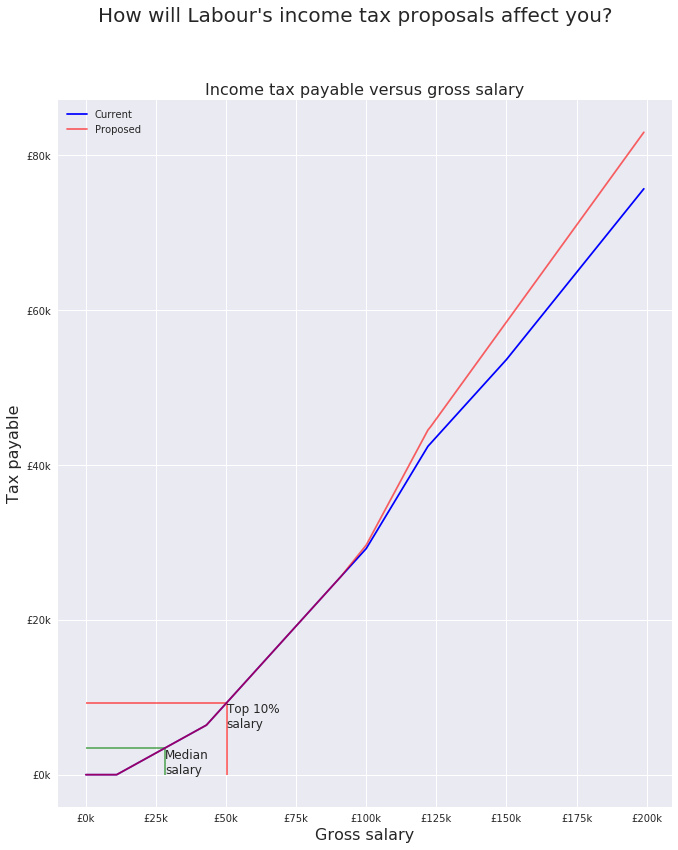

In [3]:
median = 28200
median_tax = tax_on(median,bands0)

ten_percent = 50220
ten_percent_tax = tax_on(ten_percent,bands0)

fig, axes = plt.subplots(1,figsize=(11,13),facecolor="white")

fig.suptitle("How will Labour's income tax proposals affect you?",fontsize=20)

xs = np.arange(0,200000,1000)

ts0 = np.array([tax_on(x,bands0) for x in xs])
axes.plot(xs,ts0,"b",label="Current")

ts1 = np.array([tax_on(x,bands1) for x in xs])
axes.plot(xs,ts1,"r",alpha=0.6,label="Proposed")

axes.set_title("Income tax payable versus gross salary",fontsize=16)
axes.set_xlabel("Gross salary",fontsize=16)
axes.set_ylabel("Tax payable",fontsize=16)

thousands = ticker.FuncFormatter(lambda x, pos: "£{}k".format(int(x/1000)))
axes.xaxis.set_major_formatter(thousands)
axes.yaxis.set_major_formatter(thousands)

axes.vlines(median,0,median_tax,"g",alpha=0.6)
axes.hlines(median_tax,0,median,"g",alpha=0.6)
axes.annotate("Median\nsalary",xy=(median,median_tax),verticalalignment='top',fontsize=12)

axes.vlines(ten_percent,0,ten_percent_tax,"r",alpha=0.6)
axes.hlines(ten_percent_tax,0,ten_percent,"r",alpha=0.6)
axes.annotate("Top 10%\nsalary",xy=(ten_percent,ten_percent_tax),verticalalignment='top',fontsize=12)

axes.legend();